In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import networkx as nx
from pylab import rcParams
from math import *
import time
from numpy import linalg as LA
from sklearn.datasets import fetch_openml
from math import log, exp, ceil, sqrt
from sklearn.model_selection import train_test_split
from collections import defaultdict
import warnings
import json
warnings.filterwarnings('ignore', category=UserWarning)

from DiTree import *

In [2]:
save = False

In [3]:
def random_graph(v, num_e):
    e = np.clip(num_e, v-1, v*(v-1)//2)
    rng = np.random.default_rng()
    G = nx.random_tree(v)
    i = v-1
    while i < e:
        v_a, v_b = tuple(rng.integers(v, size=2))
        if not G.has_edge(v_a, v_b) and v_a != v_b:
            G.add_edge(v_a, v_b)
            i += 1
    return G

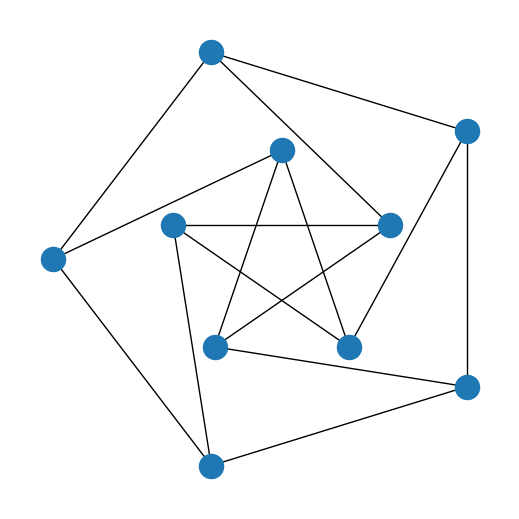

In [4]:
fig = plt.figure(figsize=(5,5))
g = nx.petersen_graph()
nx.draw_shell(g, nlist=[range(5,10), range(0,5)])
plt.box(True)
plt.show()

if save:
    fig.savefig("petersen_graph.pdf", dpi=600, format="pdf", bbox_inches="tight", pad_inches=1)

In [ ]:
fig = plt.figure(figsize=(6,6))
g = random_graph(100, 220)
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, node_size=50, with_labels=False, pos=pos)
plt.box(False)
plt.show()

if save:
    fig.savefig("random_graph.pdf", dpi=600, format="pdf", bbox_inches="tight", pad_inches=1)

In [6]:
def star_graph(N):
    G_R, G_C = nx.DiGraph(), nx.DiGraph()
    G_R.add_nodes_from(range(N))
    G_C.add_nodes_from(range(N))
    for i in range(1,N):
        G_R.add_edge(0,i)
        G_C.add_edge(i,0)
    return G_R, G_C

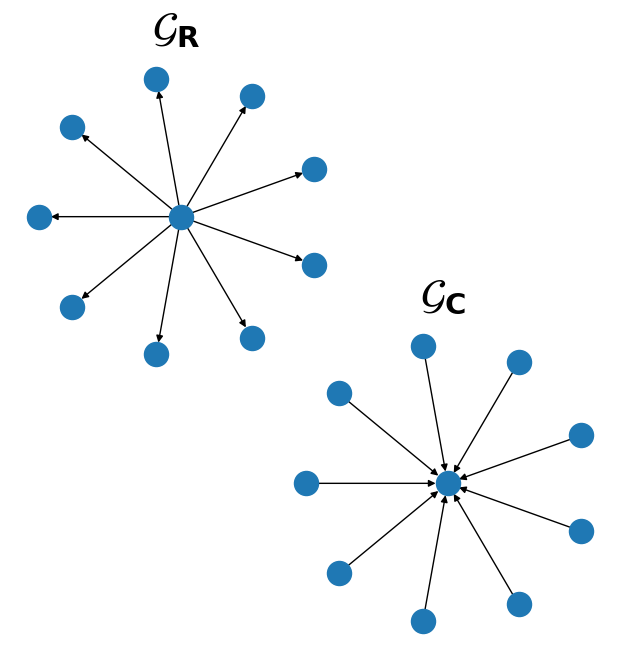

In [26]:
save = True
g_r, g_c = star_graph(10)

fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
nx.draw_shell(g_r, nlist=[range(0,1), range(1,10)])
plt.title(r"$\mathcal{G}_\mathbf{R}$", fontsize=30)
plt.subplot(2,2,4)
nx.draw_shell(g_c, nlist=[range(0,1), range(1,10)])
plt.title(r"$\mathcal{G}_\mathbf{C}$", fontsize=30)

plt.subplots_adjust(left=0,bottom=0,right=0.6,top=0.6,wspace=-0.2,hspace=-0.2)
plt.show()

if save:
    fig.savefig("star_digraphs.pdf", dpi=600, format="pdf", bbox_inches="tight", pad_inches=1)

In [ ]:
ns = 40
tree_gen = DiTree()
g_r, _ = tree_gen.sparse_tree_digraph(100, 200, is_row_stoch=True)
g_c, _ = tree_gen.sparse_tree_digraph(100, 200, is_row_stoch=False)

fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
pos = nx.kamada_kawai_layout(g_r)
nx.draw_networkx_nodes(g_r, node_size=ns, pos=pos)
nx.draw_networkx_edges(g_r, node_size=ns, alpha=0.5, pos=pos)
plt.box(False)
plt.title(r"$\mathcal{G}_\mathbf{R}$", fontsize=30)

plt.subplot(2,2,4)
pos = nx.kamada_kawai_layout(g_c)
nx.draw_networkx_nodes(g_c, node_size=ns, pos=pos)
nx.draw_networkx_edges(g_c, node_size=ns, alpha=0.5, pos=pos)
plt.box(False)
plt.title(r"$\mathcal{G}_\mathbf{C}$", fontsize=30)

plt.subplots_adjust(left=0,bottom=0,right=0.6,top=0.6,wspace=-0.3,hspace=-0.3)
plt.show()

In [43]:
if save:
    fig.savefig("random_digraphs.pdf", dpi=600, format="pdf", bbox_inches="tight", pad_inches=1)